# Домашнее Задание по Эконометрике
#### Выполнили студенты БЭК181:
- Байкалова Дарья
- Петросян Арина

### Часть 1: Анализ месячного временного ряда

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

  Using cached https://files.pythonhosted.org/packages/08/b9/b4f0938b38dbe775c4def707f525ab816b9d0215ecd8ab2d76780f4514f8/cmdstanpy-0.9.68-py3-none-any.whl
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
  Using cached https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl
ERROR: prophet 1.0.1 has requirement cmdstanpy==0.9.68, but you'll have cmdstanpy 0.9.5 which is incompatible.
  Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68


#### Задание 1
«Взять языка». Возьми месячный временной ряд. Можно не один, а несколько, чтобы использовать
дополнительные ряды как предикторы основного. Не бери цены финансовых инструментов, так как
их приращение плохо прогнозируется в силу эффективности рынка. Разумно взять реальные показатели. Если очень хочется работать с финансовыми данными, можно взять волатильность, она
прогнозируется хорошо. Максимально чётко укажи, откуда взяты ряды. Если ряды парсились, то
приведи код.

In [ ]:
from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


plt.style.use('seaborn')
%matplotlib inline

In [ ]:
link = "https://github.com/Mcompetitions/M4-methods/raw/master/Dataset/Train/Monthly-train.csv"
ts = pd.read_csv(link, index_col=0)

In [ ]:
monthly = ts.loc["M1"].dropna() # macro data
monthly.index = pd.date_range(start='06.01.1981', periods=len(monthly), freq='M')

In [ ]:
monthly

1981-06-30    8000.0
1981-07-31    8350.0
1981-08-31    8570.0
1981-09-30    7700.0
1981-10-31    7080.0
               ...  
2020-02-29    5130.0
2020-03-31    5090.0
2020-04-30    5210.0
2020-05-31    4910.0
2020-06-30    6890.0
Freq: M, Name: M1, Length: 469, dtype: float64

####Задание 2

 «Намалевич». Построй графики рядов, графики автокорреляционных функций, графики с нарезкой ряда на годы для иллюстрации сезонности.

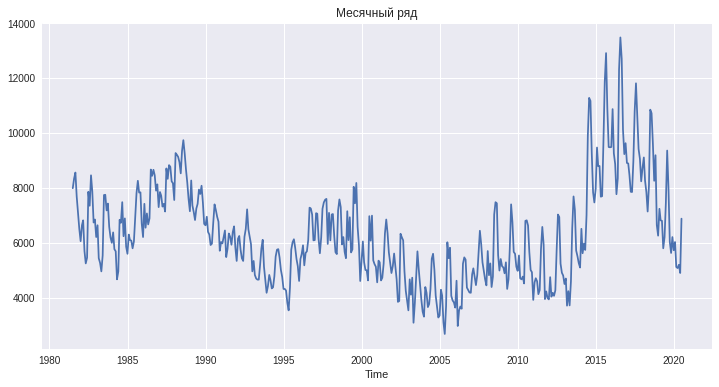

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly)
plt.xlabel('Time')
plt.title("Месячный ряд")
plt.show()

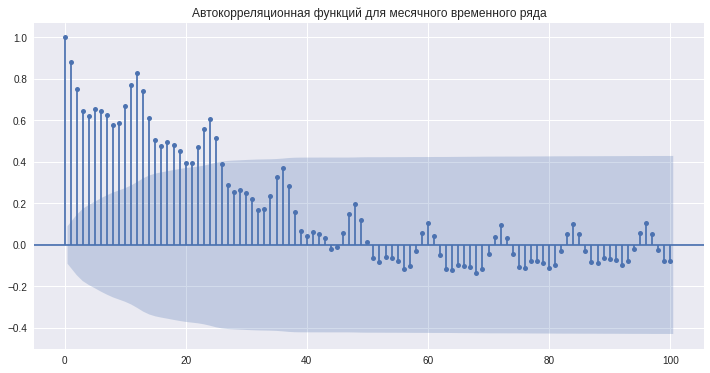

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(monthly, lags=100, ax=ax);
plt.title("Автокорреляционная функций для месячного временного ряда")
plt.show()

Прослеживается сезонность 12 месяцев

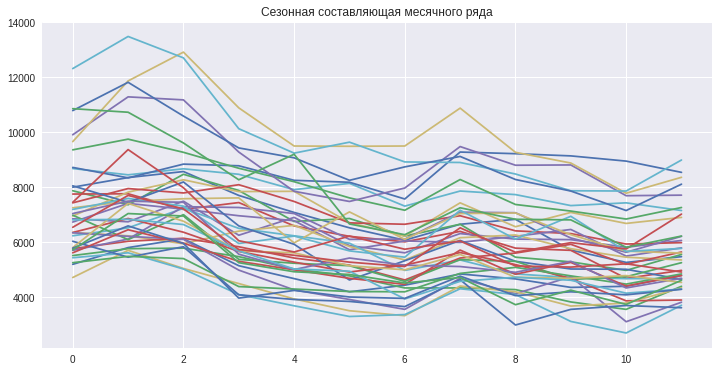

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(0, len(monthly)-12,12):
  plt.plot(list(monthly.loc[monthly.index[i:(i+12)]]))

plt.title("Сезонная составляющая месячного ряда")
plt.show()

#### Задание 3
 «Твиттер». Кратко прокомментируй полученные графики. Явлются ли ряды сезонными? есть ли тренд? стационарны ли ряды? есть ли точки излома? растёт ли амплитуда колебаний ряда? Возьми логарифм ряда, если душа тянется к логарифму.

- Да, ряд является сезонным (12 месяцев): это видно из графика автокорреляционной функции и из наложенных кусоков ряда друг на друга (их форма схожа)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly, model = "additive")

<AxesSubplot:title={'center':'Остаток'}>

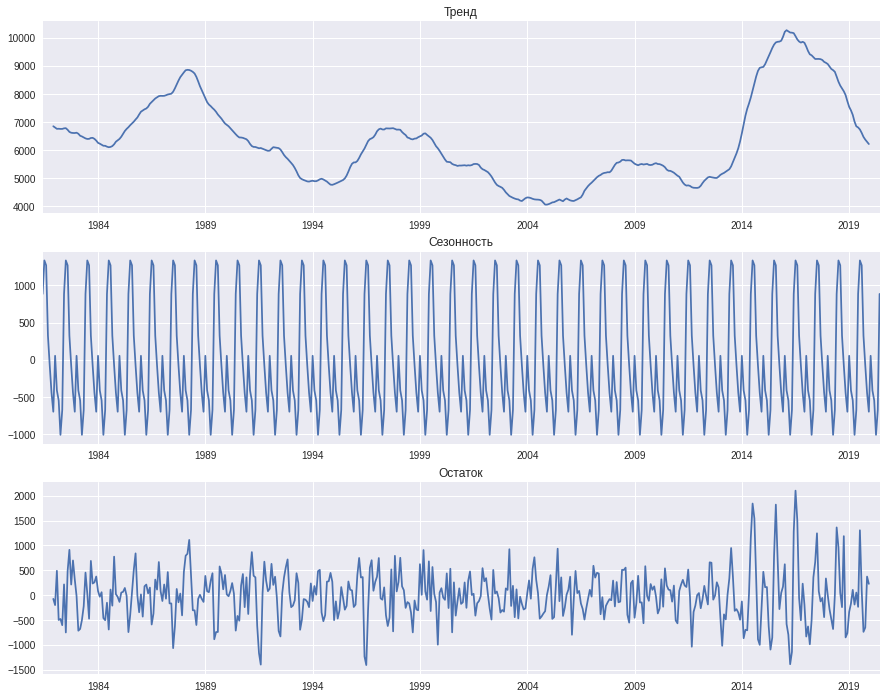

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,12))
decomposition.trend.plot(ax=ax1, title="Тренд")
decomposition.seasonal.plot(ax=ax2, title="Сезонность")
decomposition.resid.plot(ax=ax3, title="Остаток")

- На графике декомпозиции видно, что наблюдется стохастический тренд
- Амплитуда сокращалась, потом начала увеличиваться
- Есть несколько точек излома (7)

In [ ]:
from statsmodels.tsa.stattools import kpss, adfuller

kpss(monthly)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.32221798959631015,
 0.1,
 18,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

- Исходя из КПСС - теста гипотеза о стационарности не отвергается

In [ ]:
adfuller(monthly)

(-2.6704517838510466,
 0.0792924467535559,
 15,
 453,
 {'1%': -3.444868194858831,
  '10%': -2.5701797149735146,
  '5%': -2.867941416548597},
 6994.578367085467)

- Для исходного ряда гипотеза о нестационарности не отвергается для уровня значимости 5%, но отвергается для 10%

In [ ]:
adfuller(monthly.diff().dropna())

(-3.988590375681277,
 0.0014714479876147316,
 14,
 453,
 {'1%': -3.444868194858831,
  '10%': -2.5701797149735146,
  '5%': -2.867941416548597},
 6985.073760651624)

- Для любого разумного уровня значимости гипотеза о нестационарности первой разности ряда отвергается

####Задание 4
Двенадцать месяцев». Необходимо исследовать качество прогнозов минимум 6 моделей:

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

monthly_train, monthly_test = monthly[:-12], monthly[-12:]

In [ ]:
mae_df = pd.DataFrame(columns=['Model', 'MAE'])

- Наивная модель

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

nf = NaiveForecaster()
nf.fit(monthly_train)
fh = np.arange(len(monthly_test)) + 1
nf_pred = nf.predict(fh)

mae_df = mae_df.append({'Model': 'Naive Forecaster', 'MAE': mae(monthly_test, nf_pred)}, ignore_index=True)
mae(nf_pred, monthly_test)

1669.1666666666667

- Наивная с сезонностью

In [ ]:
nfs = NaiveForecaster(sp=12)
nfs.fit(monthly_train)
fh = np.arange(len(monthly_test)) + 1
nfs_pred = nfs.predict(fh)

mae_df = mae_df.append({'Model': 'Seasonal Naive Forecaster', 'MAE': mae(monthly_test, nfs_pred)}, ignore_index=True)
mae(nfs_pred, monthly_test)

1403.3333333333333

- SARIMA(1,1,1)(1,0,0)[12]

In [ ]:
from sktime.forecasting.arima import ARIMA

sarima = ARIMA(order=(1,1,1), seasonal_order=(1,0,0,12))
sarima.fit(monthly_train)
sarima_pred = sarima.predict(fh)

mae_df = mae_df.append({'Model': 'SARIMA(1,1,1)(1,0,0)[12]', 'MAE': mae(monthly_test, sarima_pred)}, ignore_index=True)
mae(sarima_pred, monthly_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


685.1984660601544

- Алгоритм Хиндмана-Хандакара автоматического подбора SARIMA

In [ ]:
from sktime.forecasting.arima import AutoARIMA

akh = AutoARIMA(start_p=1, d=None, start_q=0, 
                       max_p=2, max_d=1, max_q=0, 
                       start_P=1, D=1, start_Q=0, 
                       max_P=1, max_D=1, max_Q=0, 
                       sp=12, suppress_warnings=True, stepwise=False, n_jobs=-1)
akh.fit(monthly_train)
akh_pred = akh.predict(fh)

mae_df = mae_df.append({'Model': 'AutoARIMA', 'MAE': mae(monthly_test, akh_pred)}, ignore_index=True)
mae(akh_pred, monthly_test)

796.1596163237824

- ETS

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

monthly_train_period = monthly_train.copy()
monthly_train_period.index = pd.PeriodIndex(monthly_train.index)
ets = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
ets.fit(monthly_train_period)
ets_pred = ets.predict(fh)

mae_df = mae_df.append({'Model': 'ETS', 'MAE': mae(monthly_test, ets_pred)}, ignore_index=True)
mae(ets_pred, monthly_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


581.710279585344

- ETS с автоматическим выбором по AIC

In [ ]:
from sktime.forecasting.ets import AutoETS

auto_ets = AutoETS(auto=True, sp=12, allow_multiplicative_trend=True)
auto_ets.fit(monthly_train_period)
auto_ets_pred = auto_ets.predict(fh)

mae_df = mae_df.append({'Model': 'AutoETS', 'MAE': mae(monthly_test, auto_ets_pred)}, ignore_index=True)
mae(auto_ets_pred, monthly_test)

667.0277334906751

In [ ]:
mae_df

,Model,MAE
0,Naive Forecaster,1669.166667
1,Seasonal Naive Forecaster,1403.333333
2,"SARIMA(1,1,1)(1,0,0)[12]",685.198466
3,AutoARIMA,796.159616
4,ETS,581.710280
5,AutoETS,667.027733


- Лучшая модель – ETS(AAA)

In [ ]:
monthly_train_period = monthly.copy()
monthly_train_period.index = pd.PeriodIndex(monthly.index)
ets = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
ets.fit(monthly_train_period)
fh = np.arange(12)
ets_pred = ets.predict(fh)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


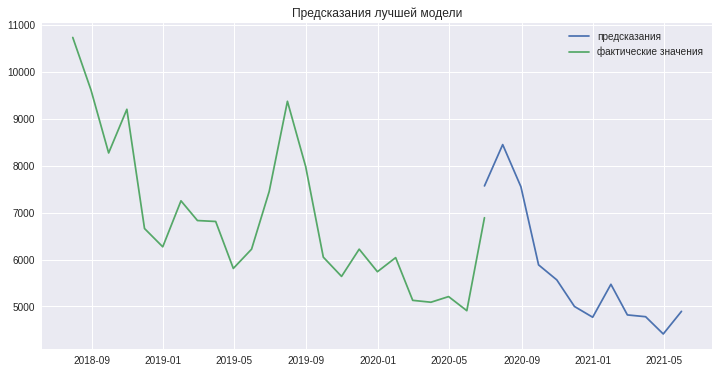

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pd.date_range(start='2020-06-01', periods=12, freq='M'), ets_pred.values, label='предсказания')
plt.plot(monthly[-24:].index, monthly[-24:].values, label='фактические значения')
plt.title('Предсказания лучшей модели')
plt.legend()

plt.show()

## Часть 2: Панельки!

In [ ]:
# !pip install pyreadstat
!git clone https://github.com/Arina1308/Julia_tutorial

fatal: destination path 'Julia_tutorial' already exists and is not an empty directory.


**Гипотеза: потребление табака позволяет предсказать потребление жевательной резинки**

Мы взяли общий файл по домохозяйствам с 1994 года. Для исследования выбрали 2 вопроса: сколько пачек табака было куплено за последние 7 дней ('E1.56B') и сколько пачек жевачки было куплено за последние 7 дней ('E1.57B'). Чтобы с данными было удобнее работать, мы скачали и работали только с нужными столбцами

In [ ]:
panel2 = pd.read_csv('/content/Julia_tutorial/panel2.csv')

In [ ]:
panel2

,id,year,tabac,gum
0,1.0,2000,132.0,78.0
1,1.0,2001,195.0,128.0
2,1.0,2002,136.0,136.0
3,1.0,2011,7.0,4.0
4,1.0,2012,12.0,5.0
...,...,...,...,...
3388,24497.0,2018,15.0,10.0
3389,24522.0,2018,10.0,2.0
3390,50004.0,2018,10.0,1.0
3391,90001.0,2019,14.0,1.0


#### Сначала посмотрим графически и попробуем ответить на вопрос так)

In [ ]:
panel3 = panel2.groupby('year').mean()
panel3

,id,tabac,gum
year,,,
2000,23.115385,73.192308,58.730769
2001,28.222222,57.088889,48.488889
2002,29.166667,73.791667,60.479167
2010,667.735135,12.697297,8.051351
2011,997.407745,15.726651,13.751708
2012,1007.885366,14.243902,12.243902
2013,1177.747126,11.586207,11.201149
2014,1233.704545,11.853896,7.314935
2015,1538.620072,10.774194,7.555556


In [ ]:
panel3.index = pd.to_datetime(panel3.index, format='%Y')

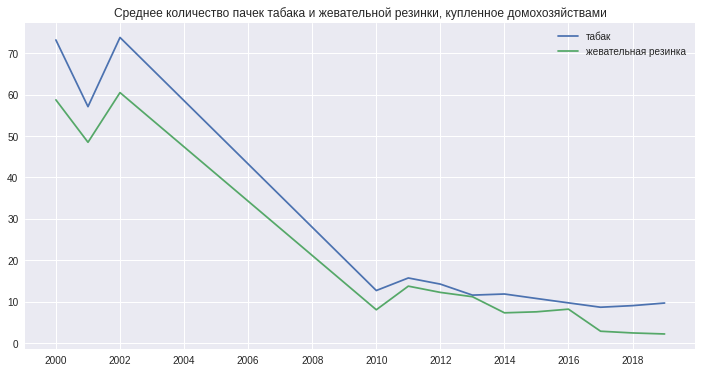

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(panel3.index, panel3['tabac'], label='табак')
plt.plot(panel3.index, panel3['gum'], label='жевательная резинка')
plt.legend()
plt.title('Среднее количество пачек табака и жевательной резинки, купленное домохозяйствами')

plt.show()

Как видно на графике, тренды количества покупаемого табака и жевательной резинки близки друг к другу, что свидетельствует о том, что мы сможем примерно предсказывать потребление жевачки с помощью табака

#### А теперь к моделям!

In [ ]:
!pip install linearmodels

- Сквозная модель

In [ ]:
panel2 = panel2.set_index(['id', 'year'])

In [ ]:
formula = 'gum ~ 1 + tabac + EntityEffects'
dependent = panel2.gum
regressors = panel2[['tabac']]

In [ ]:
from linearmodels.panel import PooledOLS
model_pool = PooledOLS.from_formula(formula, panel2)
model_pool_fitted = model_pool.fit(cov_type='clustered', cluster_entity=True)
print(model_pool_fitted)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    gum   R-squared:                        0.5450
Estimator:                  PooledOLS   R-squared (Between):              0.2126
No. Observations:                3393   R-squared (Within):               0.5413
Date:                Wed, Jun 16 2021   R-squared (Overall):              0.5450
Time:                        16:17:33   Log-likelihood                -1.347e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4061.3
Entities:                        1019   P-value                           0.0000
Avg Obs:                       3.3297   Distribution:                  F(1,3391)
Min Obs:                       1.0000                                           
Max Obs:                       13.000   F-statistic (robust):             142.87
                            

- FE

In [ ]:
from linearmodels import PanelOLS
model_fe = PanelOLS.from_formula(formula, panel2)
model_fe_fitted = model_fe.fit(cov_type='clustered', cluster_entity=True)
print(model_fe_fitted)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    gum   R-squared:                        0.5413
Estimator:                   PanelOLS   R-squared (Between):              0.2113
No. Observations:                3393   R-squared (Within):               0.5413
Date:                Wed, Jun 16 2021   R-squared (Overall):              0.5449
Time:                        16:17:33   Log-likelihood                 -1.29e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2800.9
Entities:                        1019   P-value                           0.0000
Avg Obs:                       3.3297   Distribution:                  F(1,2373)
Min Obs:                       1.0000                                           
Max Obs:                       13.000   F-statistic (robust):             112.14
                            

- RE

In [ ]:
from linearmodels.panel import RandomEffects
model_re = RandomEffects.from_formula(formula, panel2)
model_re_fitted = model_re.fit(cov_type='clustered', cluster_entity=True)
# dir(model_re_fitted)
print(model_re_fitted)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    gum   R-squared:                        0.5450
Estimator:              RandomEffects   R-squared (Between):              0.2126
No. Observations:                3393   R-squared (Within):               0.5413
Date:                Wed, Jun 16 2021   R-squared (Overall):              0.5450
Time:                        16:17:33   Log-likelihood                -1.347e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4061.3
Entities:                        1019   P-value                           0.0000
Avg Obs:                       3.3297   Distribution:                  F(1,3391)
Min Obs:                       1.0000                                           
Max Obs:                       13.000   F-statistic (robust):             142.87
                            

FE и RE на R

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('plm')
install.packages('lmtest')
install.packages('skimr')
install.packages('car')
install.packages('gplots')
install.packages('rio')
install.packages('tidyverse')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plm_2.4-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1600619 bytes (1.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [ ]:
%%R

library(plm) # Работа с панельными данными
library(lmtest) # Оценка регрессий и ковариационных матриц параметров
library(skimr) # Красивый summary
library(car) # Линейные модели
library(gplots) # Графики гетерогенности
library(rio) # Чтение данных
library(tidyverse) # Обработка данных


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Loading required package: carData

R[write to console]: 
Attaching package: ‘gplots’


R[write to console]: The following object is masked from ‘package:stats’:

    lowess


R[write to console]: The following rio suggested packages are not installed: ‘arrow’, ‘feather’, ‘fst’, ‘hexView’, ‘pzfx’, ‘readODS’, ‘rmatio’
Use 'install_formats()' to install them

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between() masks plm::between()
✖

In [ ]:
%%R
panelr = import('/content/Julia_tutorial/panel2.csv')

In [ ]:
%%R
head(panelr)

  id year tabac gum
1  1 2000   132  78
2  1 2001   195 128
3  1 2002   136 136
4  1 2011     7   4
5  1 2012    12   5
6  1 2013    19   7


FE

In [ ]:
%%R
ffe = plm(gum ~ tabac, model = "within", data = panelr)
summary(ffe)

Oneway (individual) effect Within Model

Call:
plm(formula = gum ~ tabac, data = panelr, model = "within")

Unbalanced Panel: n = 1019, T = 1-13, N = 3393

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-113.9753   -4.3672    0.0000    2.3715  116.6570 

Coefficients:
      Estimate Std. Error t-value  Pr(>|t|)    
tabac 0.712972   0.013472  52.923 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    869550
Residual Sum of Squares: 398820
R-Squared:      0.54135
Adj. R-Squared: 0.3444
F-statistic: 2800.85 on 1 and 2373 DF, p-value: < 2.22e-16


In [ ]:
%%R
coeftest(ffe, vcov=vcovHC(ffe, cluster="group"))


t test of coefficients:

      Estimate Std. Error t value  Pr(>|t|)    
tabac 0.712972   0.067307  10.593 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



RE

In [ ]:
%%R
fre = plm(gum ~ tabac, model = "random", data = panelr)
summary(fre)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = gum ~ tabac, data = panelr, model = "random")

Unbalanced Panel: n = 1019, T = 1-13, N = 3393

Effects:
                 var std.dev share
idiosyncratic 168.07   12.96     1
individual      0.00    0.00     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-117.5385   -5.6296   -2.2134    1.9109  135.4046 

Coefficients:
            Estimate Std. Error z-value Pr(>|z|)    
(Intercept) 0.132441   0.267755  0.4946   0.6209    
tabac       0.708096   0.011111 63.7286   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1226000
Residual Sum of Squares: 557860
R-Squared:      0.54497
Adj. R-Squared: 0.54484
Chisq: 4061.33 on 1 DF, p-value: < 2.22e-16


In [ ]:
%%R
coeftest(fre, vcov=vcovHC(ffe, cluster="group"))


t test of coefficients:

      Estimate Std. Error t value  Pr(>|t|)    
tabac 0.708096   0.067307   10.52 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



#### Тест Хаусмана и выбор лучшей модели

In [ ]:
%%R
phtest(ffe, fre)


	Hausman Test

data:  gum ~ tabac
chisq = 0.40973, df = 1, p-value = 0.5221
alternative hypothesis: one model is inconsistent



Гипотеза о состоятельности обеих оценок не отвергается на любом разумном уровне значимости. Таким образом, можно говорить о том, что оценки обеих моделей асимптотически эквивалентны и индивидуальные регрессоры не коррелируют с регрессорами => выбираем RE модель

#### Вывод

Во всех рассмотренных моделях коэффициент получился положительным и значимым. Это говорит о том, что потребление табака положительно влияет на потребление жевательной резинки